18


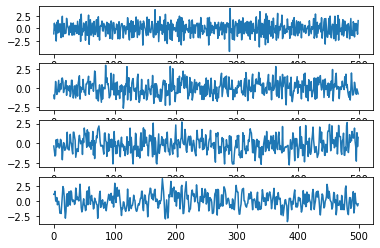

In [11]:
#########Time Series generation

###Moving average
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1,-0.5])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=500)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.5])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=500)
plt.plot(simulated_data_2)


ma_data = []
####Moving average sample generation
vals = np.arange(-0.9,0.9,0.1)
for r in vals:
    ar1 = np.array([1])
    ma1 = np.array([1,r])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ma_data.append(simulated_data)

print (len(ma_data))
plt.subplot(4,1,1)
plt.plot(ma_data[0])
plt.subplot(4,1,2)
plt.plot(ma_data[10])
plt.subplot(4,1,3)
plt.plot(ma_data[12])
plt.subplot(4,1,4)
plt.plot(ma_data[17])



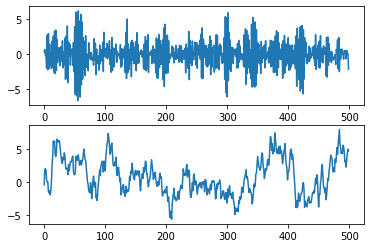

18


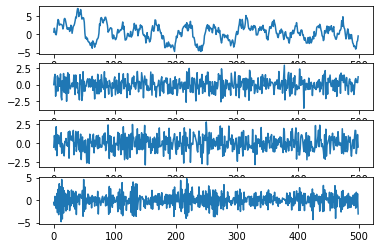

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, 0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=500)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1,-0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=500)
plt.plot(simulated_data_2)
plt.show()


ar_data = []
####AR sample generation
vals = np.arange(-0.9,0.9,0.1)
for r in vals:
    ar1 = np.array([1,r])
    ma1 = np.array([1])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ar_data.append(simulated_data)

print (len(ar_data))
plt.subplot(4,1,1)
plt.plot(ar_data[0])
plt.subplot(4,1,2)
plt.plot(ar_data[10])
plt.subplot(4,1,3)
plt.plot(ar_data[12])
plt.subplot(4,1,4)
plt.plot(ar_data[17])



In [3]:
print(len(ma_data[1]))
print("END MA DATA")
print(len(ar_data[1]))

500
END MA DATA
500


In [4]:
data = ma_data +ar_data
print(len(data))

36


36


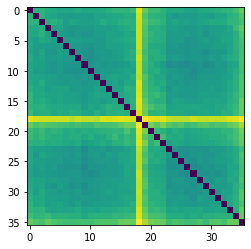

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
#X = [[0, 1], [1, 1]]1
# distance between rows of X
dist = euclidean_distances(data, data)
print(len(dist))
plt.imshow(dist)

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist)
print(cluster.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [7]:
from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
dist_dtw = []
for i in range(0,35):
    dist_temp = []
    for j in range(0,35):
        dist, cost_matrix, acc_cost_matrix, path = dtw(data[i], data[j], dist=l2_norm)
        dist_temp.append(dist)
    dist_dtw.append(dist_temp)

print(len(dist_dtw))
imshow(dist_dtw)

35


NameError: name 'imshow' is not defined

[[0.0, 0.3650509277506895, 0.3671996114617647, 0.35258374066696363, 0.3532859802458079, 0.3627058283919521, 0.3631446210507122, 0.3743913499706988, 0.38505290587067226, 0.4401139441765663, 0.43400539142489625, 0.4399458897700334, 0.4924135167137338, 0.4900125982443877, 0.5003620046741393, 0.5207167792921651, 0.55441065308142, 0.49035049981690354, 0.9397224906949495, 0.7404130162365562, 0.6329250157162475, 0.598798841537302, 0.5448607600227987, 0.5177175513089327, 0.49667635667756094, 0.4495366416909803, 0.4323373214546888, 0.4109177727864054, 0.3847886143102115, 0.3893530542950992, 0.36730862410410164, 0.3579606377665239, 0.34429639606194645, 0.3882064486383666, 0.40555468868860844], [0.3650509277506895, 0.0, 0.32621544134425395, 0.29062810383619153, 0.3163376268319566, 0.3007596436010065, 0.3108635760183336, 0.295858219759627, 0.3209539274357671, 0.3404443923106236, 0.33936999798968964, 0.36490543570306955, 0.37737639877653717, 0.39444775086139505, 0.4115660400602775, 0.42558344435261

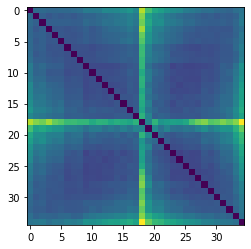

In [10]:
plt.imshow(dist_dtw)
print (dist_dtw)

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist_dtw)
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


36
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


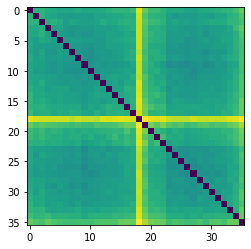

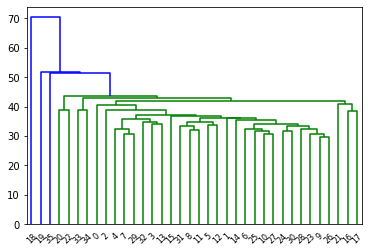

In [49]:
from sklearn.metrics.pairwise import pairwise_distances
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Y = pairwise_distances(data, data, metric='euclidean')
print(len(Y))
plt.figure(0)
plt.imshow(Y)

plt.figure(1)
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = cluster.fit_predict(Y)
print(cluster.labels_)


In [ ]:
import numpy as np

def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

data = []
with open('D:/Studies/NDD_1/Codes/timeSeries/timeSeriesSampleData.dat', 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split(" ")
        data.append([float(i) if is_float(i) else i for i in k]) 

data = np.array(data, dtype='O')

In [ ]:
import random
x = 0
sample = []
while (x<600):
    for i in range(0,9):
        idx = random.randint(x,x+99)
        sample.append(data[idx])
    x = x+100

print(len(sample))
plt.plot(data[10])
plt.plot(sample[1])

sample = np.asarray(sample)